In [17]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import mcmc

In [2]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
[0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])

y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [3]:
def gen_conf_matrix(y: np.ndarray):
    """
    Simple function to generate the configuration matrix for variable number of roads
    """
    num_vers = y.size+1
    num_pathways = num_vers-1

    pathways = []
    for i in range(1,num_vers+1):
        for j in range(1,num_vers+1):
            if i < j:
                pathways += [(i,j)]

    print(pathways)

    return np.array([[ 1 if (p1<=i and i<p2) else 0 for (p1,p2) in pathways] for i in range(1, num_pathways+1)])

In [11]:
num_con = 8
yprime  = y[:num_con]
Aprime  = gen_conf_matrix(yprime)

print(Aprime)
print(yprime)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]]
[1087 1008 1068 1204 1158 1151 1143]


In [12]:
# it produced only 400 samples...
trace = mcmc.sample_mh_trace_from_conf_matrix_smt(A=A,y=y)

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 35
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 28
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler


Formula is satisfiable
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 1582.21
epoch time: 1799.96
grow_seed time: 72.1363
initial_solving time: 0.00179346
output time: 1.80673
start_epoch time: 217.644
total time: 1800.01
Epochs: 65612
MAX-SMT calls: 65613
SMT calls: 0
Assignments considered (with repetitions): 6692424
Models (with repetitions): 6692424
Unique models (# samples in file): 432
-----------------------------------
The parameter `solver_samples` only contains 432 samples. Thus, every chain will contain 432 instead of 10000. Try running the SAT/SMT sampler longer to obtain more samples.


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (28), generating only 20 plots
  warnings.warn(


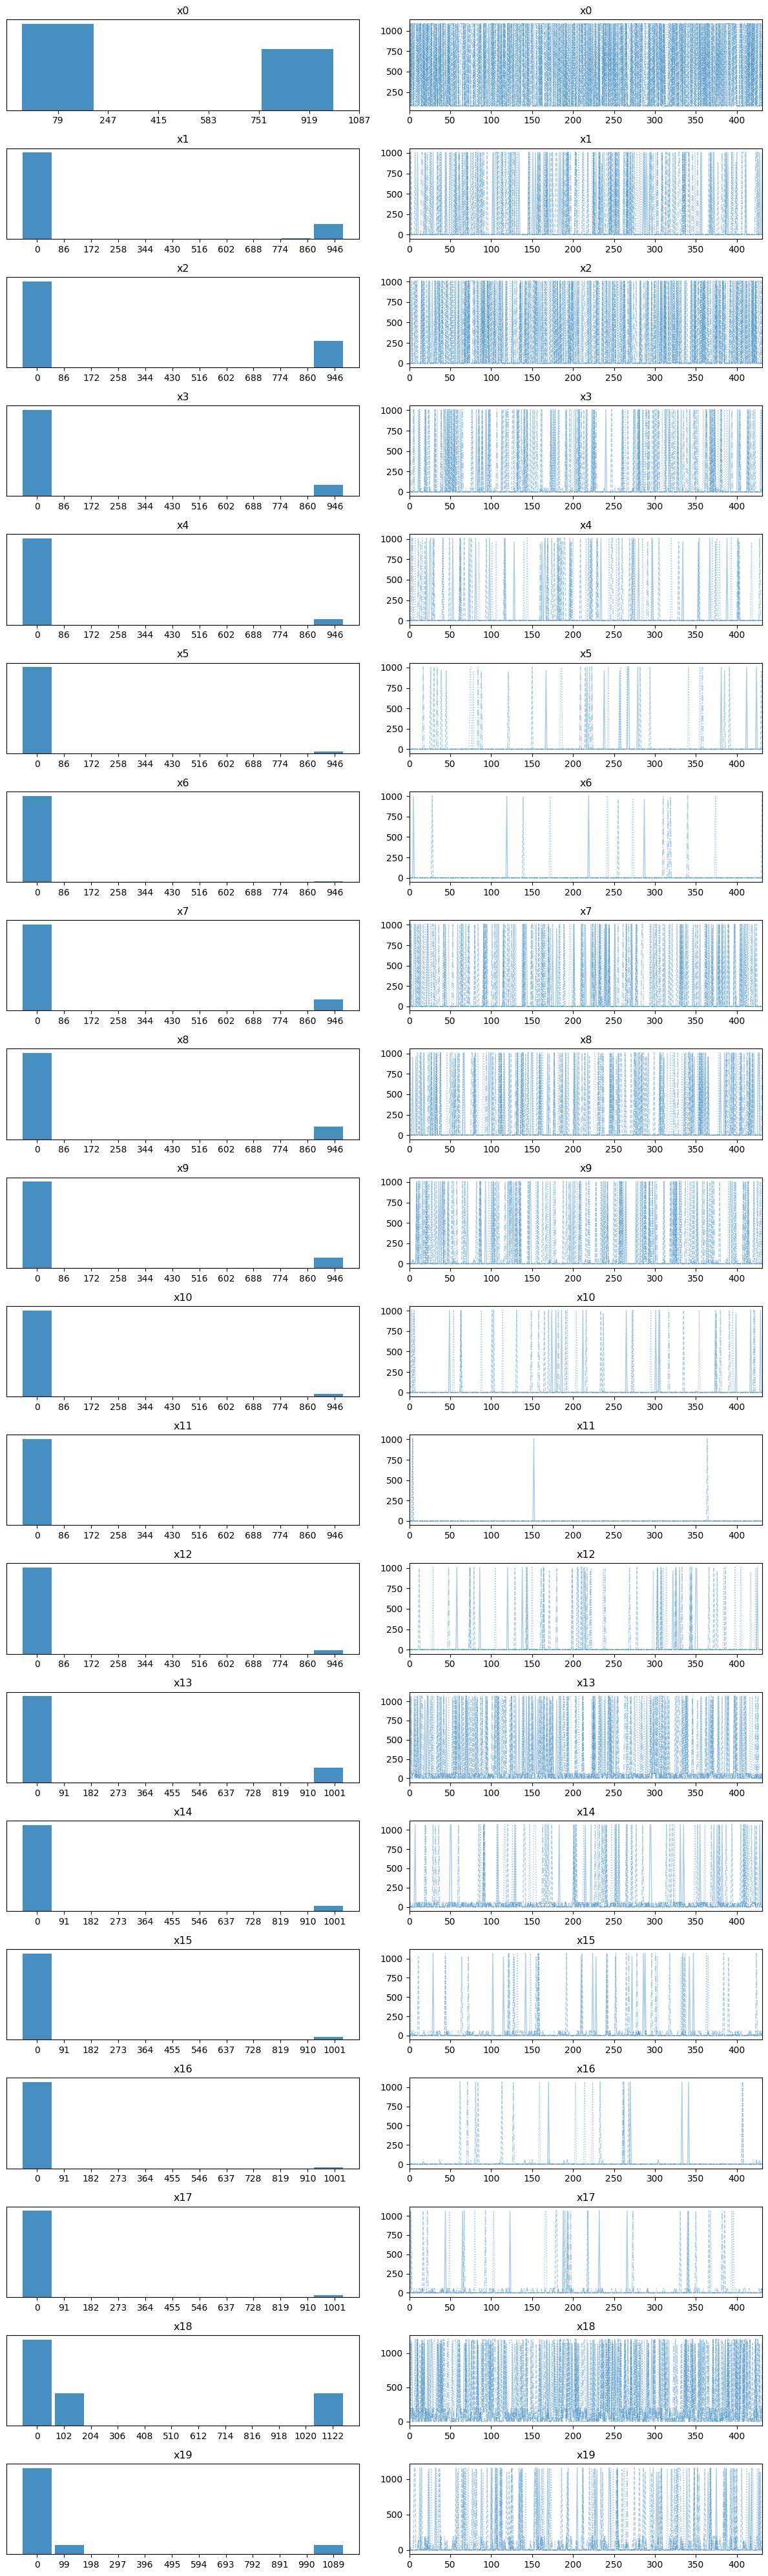

In [18]:
# Plot the posterior
import matplotlib.pyplot as plt
az.plot_trace(trace);
plt.savefig('megasampler_trace_plot.png', dpi=150);

In [14]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,496.963,496.483,79.0,1087.0,11.353,8.029,1905.0,1728.0,1.0
x1,146.704,355.201,0.0,1008.0,8.856,6.266,1607.0,1610.0,1.0
x2,237.701,427.693,0.0,1008.0,10.148,7.179,1768.0,1728.0,1.0
x3,115.718,319.343,0.0,1008.0,7.538,5.338,1851.0,1728.0,1.0
x4,57.683,232.377,0.0,7.0,5.753,4.069,1657.0,1642.0,1.0
x5,23.056,149.362,0.0,0.0,3.765,2.664,1654.0,1666.0,1.0
x6,9.176,94.959,0.0,0.0,2.334,1.651,1680.0,1650.0,1.0
x7,116.706,321.813,0.0,1008.0,7.492,5.301,1863.0,1728.0,1.0
x8,125.185,331.356,0.0,1008.0,7.818,5.532,1792.0,1728.0,1.0
x9,108.556,310.525,0.0,1008.0,7.244,5.123,1806.0,1728.0,1.0
